- This notebook is to showcase the results plot
    * Features is known
    * Features is unknown

In [10]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *

In [2]:
def load_pickle_data(file_path):
    # Load the .pkl file
    with open(file_path, 'rb') as file:
        load_data = pickle.load(file)
        
    return load_data

In [3]:
load_data1 = load_pickle_data('Results_Data/Random_results_data_2023-12-29_10-21-38.pkl')
load_data2 = load_pickle_data('Results_Data/Uncertainty_results_data_2023-12-29_13-47-17.pkl')
load_data3 = load_pickle_data('Results_Data/GSx_results_data_2023-12-29_15-56-53.pkl')
load_data4 = load_pickle_data('Results_Data/GSy_results_data_2023-12-29_21-00-15.pkl')
load_data5 = load_pickle_data('Results_Data/iGS_results_data_2023-12-30_16-13-33.pkl')

In [4]:
MAEsmooth1, MAEsmooth2, MAEsmooth3, MAEsmooth4, MAEsmooth5=\
load_data1['MAEsmooth1'],load_data2['MAEsmooth1'],load_data3['MAEsmooth1'],load_data4['MAEsmooth1'], load_data5['MAEsmooth1']

In [5]:
MAEsmooth_std1, MAEsmooth_std2, MAEsmooth_std3, MAEsmooth_std4, MAEsmooth_std5=\
load_data1['MAEsmooth_std1'],load_data2['MAEsmooth_std1'],load_data3['MAEsmooth_std1'],load_data4['MAEsmooth_std1'], load_data5['MAEsmooth_std1']

In [149]:
MAEsmooth_std5[60]

array([0.00931105])

In [151]:
MAEsmooth5[50]

array([0.13975053])

In [150]:
MAEsmooth_std5[50]

array([0.01149265])

In [6]:
save_path='Results_Plot/'
filename='Results_optimal_update'

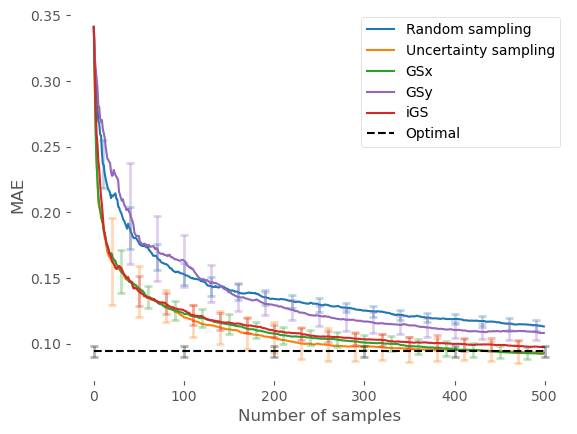

In [19]:
plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='w'

fig, ax = plt.subplots()

offset = 10
error_freq = 30

# List of your datasets and their corresponding standard deviation arrays
datasets = [MAEsmooth1, MAEsmooth2, MAEsmooth3, MAEsmooth4, MAEsmooth5]
std_devs = [MAEsmooth_std1, MAEsmooth_std2, MAEsmooth_std3, MAEsmooth_std4, MAEsmooth_std5]
labels = ['Random sampling', 'Uncertainty sampling', 'GSx', 'GSy', 'iGS']
# colors = ['blue', 'orange', 'green', 'purple', 'red']
tableau_colors = plt.get_cmap('tab10').colors[:5]
# Shift 4th and 5th colors to the first two positions
shifted_colors = tableau_colors[:3] + tableau_colors[4:5] + tableau_colors[3:4] 
offsets = [10, 20, 30, 40, 50]

for i, (dataset, std_dev, label, color, offset) in enumerate(zip(datasets, std_devs, labels, shifted_colors, offsets)):
    y = dataset
    e = std_dev
    x = np.arange(len(y))
    p = ax.plot(x, y, label=label, color=color)

    xe, ye, ee = x[offset::error_freq], y[offset::error_freq], e[offset::error_freq]
    xe, ye, ee = xe.flatten(), ye.flatten(), ee.flatten()
    ax.errorbar(xe, ye, yerr=ee, alpha=0.3, ls='none', ecolor=p[0].get_color(), elinewidth=2, capsize=3, capthick=2)
    offset += error_freq

# optimal line
xx = [0, 100, 200, 300, 400, 500]
yy = [opt] * len(xx)
ee = [opt_error[0]] * len(xx)

p = ax.plot(xx, yy, 'k--', label='Optimal')

ax.errorbar(xx, yy, yerr=ee, alpha=0.3, ls='none', ecolor=p[-1].get_color(), elinewidth=2, capsize=3, capthick=2)

plt.xlabel('Number of samples')
plt.ylabel('MAE')
plt.legend()
plt.savefig(save_path+filename, dpi=200)
# plt.title('MAE Smooth with Error Bars')

# plt.grid(True)

plt.show()

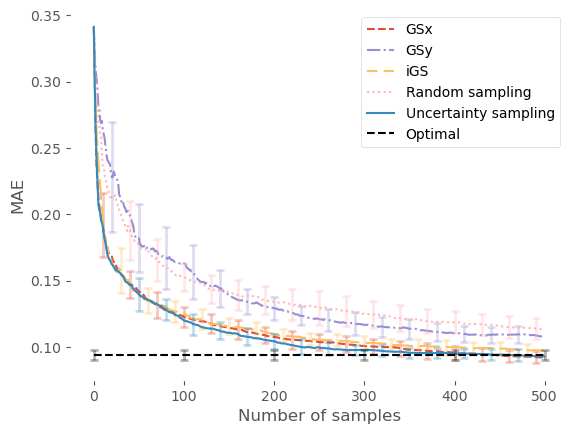

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Set ggplot style
plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='w'

fig, ax = plt.subplots()

# List of your datasets and their corresponding standard deviation arrays
datasets = [MAEsmooth3, MAEsmooth4, MAEsmooth5, MAEsmooth1, MAEsmooth2]
std_devs = [MAEsmooth_std3, MAEsmooth_std4, MAEsmooth_std5, MAEsmooth_std1, MAEsmooth_std2]
labels = ['GSx', 'GSy', 'iGS', 'Random sampling', 'Uncertainty sampling']

# Define line styles
line_styles = {
    'Uncertainty sampling': 'solid',
    'Random sampling': 'dotted',
    'GSx': 'dashed',
    'GSy': 'dashdot',
    'iGS': (5, (10, 3))
}

# Shift colors for better visibility
# tableau_colors = plt.get_cmap('tab10').colors[:5]
# shifted_colors = tableau_colors[:3] + tableau_colors[4:5] + tableau_colors[3:4]

offset = 10
error_freq = 30

for dataset, std_dev, label, offset in zip(datasets, std_devs, labels, offsets):
    y = dataset
    e = std_dev
    x = np.arange(len(y))
    line_style = line_styles[label]
    
    p = ax.plot(x, y, label=label, linestyle=line_style)

    xe, ye, ee = x[offset::error_freq], y[offset::error_freq], e[offset::error_freq]
    xe, ye, ee = xe.flatten(), ye.flatten(), ee.flatten()
    ax.errorbar(xe, ye, yerr=ee, alpha=0.3, ls='none', ecolor=p[0].get_color(), elinewidth=2, capsize=3, capthick=2)
    offset += error_freq

# optimal line
xx = [0, 100, 200, 300, 400, 500]
yy = [opt] * len(xx)
ee = [opt_error[0]] * len(xx)

p = ax.plot(xx, yy, 'k--', label='Optimal')

ax.errorbar(xx, yy, yerr=ee, alpha=0.3, ls='none', ecolor=p[-1].get_color(), elinewidth=2, capsize=3, capthick=2)

plt.xlabel('Number of samples')
plt.ylabel('MAE')
plt.legend()
plt.savefig(save_path + filename, dpi=300)
plt.show()


In [120]:
pwd

'/Users/haoliu/Documents/GitHub/Active-Learning-Using-various-representations'

In [87]:
yy

[0.09408898028999695,
 0.09408898028999695,
 0.09408898028999695,
 0.09408898028999695,
 0.09408898028999695,
 0.09408898028999695]

In [25]:
save_path='Results_Plot/'
filename='Results_optimal_short_update'

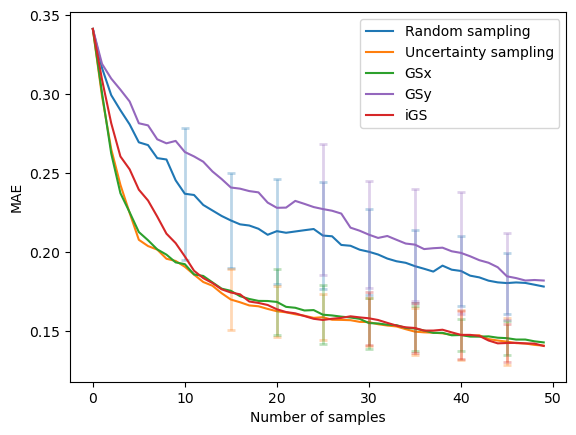

In [165]:
fig, ax = plt.subplots()

offset = 10
error_freq = 5

num_samples_to_plot = 50  # Number of samples to plot

# List of your datasets and their corresponding standard deviation arrays
datasets = [MAEsmooth1[:num_samples_to_plot], MAEsmooth2[:num_samples_to_plot],
            MAEsmooth3[:num_samples_to_plot], MAEsmooth4[:num_samples_to_plot],
            MAEsmooth5[:num_samples_to_plot]]

std_devs = [MAEsmooth_std1[:num_samples_to_plot], MAEsmooth_std2[:num_samples_to_plot],
            MAEsmooth_std3[:num_samples_to_plot], MAEsmooth_std4[:num_samples_to_plot],
            MAEsmooth_std5[:num_samples_to_plot]]

labels = ['Random sampling', 'Uncertainty sampling', 'GSx', 'GSy', 'iGS']
# colors = ['blue', 'orange', 'green', 'purple', 'red']
tableau_colors = plt.get_cmap('tab10').colors[:5]
# Shift 4th and 5th colors to the first two positions
shifted_colors = tableau_colors[:3] + tableau_colors[4:5] + tableau_colors[3:4] 

for i, (dataset, std_dev, label, color) in enumerate(zip(datasets, std_devs, labels, shifted_colors)):
    y = dataset
    e = std_dev
    x = np.arange(len(y))
    p = ax.plot(x, y, label=label, color=color)
    

    xe, ye, ee = x[offset::error_freq], y[offset::error_freq], e[offset::error_freq]
    xe, ye, ee = xe.flatten(), ye.flatten(), ee.flatten()
    ax.errorbar(xe, ye, yerr=ee, alpha=0.3, ls='none', ecolor=p[0].get_color(), elinewidth=2, capsize=3, capthick=2)
    offset += error_freq

# Your other plotting settings...

plt.xlabel('Number of samples')
plt.ylabel('MAE')
plt.legend()
plt.savefig(save_path+filename, dpi=200)

# plt.grid(True)

plt.show()

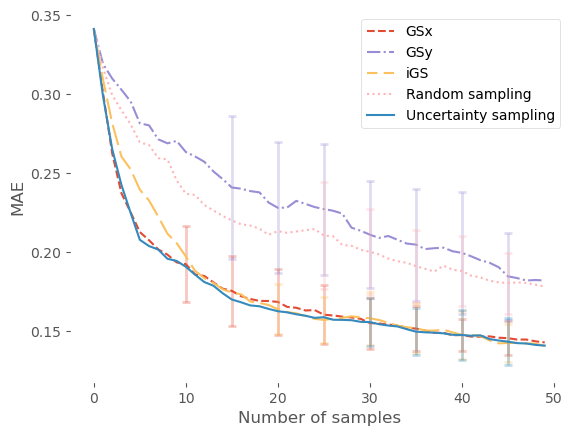

In [32]:
# Update line and color
plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='w'

fig, ax = plt.subplots()

offset = 10
error_freq = 5

num_samples_to_plot = 50  # Number of samples to plot

# List of your datasets and their corresponding standard deviation arrays
datasets = [MAEsmooth3[:num_samples_to_plot], MAEsmooth4[:num_samples_to_plot],
            MAEsmooth5[:num_samples_to_plot], MAEsmooth1[:num_samples_to_plot],
            MAEsmooth2[:num_samples_to_plot]]

std_devs = [MAEsmooth_std3[:num_samples_to_plot], MAEsmooth_std4[:num_samples_to_plot],
            MAEsmooth_std5[:num_samples_to_plot], MAEsmooth_std1[:num_samples_to_plot],
            MAEsmooth_std2[:num_samples_to_plot]]

labels = ['GSx', 'GSy', 'iGS', 'Random sampling', 'Uncertainty sampling']
# Define line styles
line_styles = {
    'Uncertainty sampling': 'solid',
    'Random sampling': 'dotted',
    'GSx': 'dashed',
    'GSy': 'dashdot',
    'iGS': (5, (10, 3))
}
# colors = ['blue', 'orange', 'green', 'purple', 'red']
# tableau_colors = plt.get_cmap('tab10').colors[:5]
# # Shift 4th and 5th colors to the first two positions
# shifted_colors = tableau_colors[:3] + tableau_colors[4:5] + tableau_colors[3:4] 

for i, (dataset, std_dev, label) in enumerate(zip(datasets, std_devs, labels)):
    y = dataset
    e = std_dev
    x = np.arange(len(y))
    line_style = line_styles[label]
    p = ax.plot(x, y, label=label, linestyle=line_style)

    xe, ye, ee = x[offset::error_freq], y[offset::error_freq], e[offset::error_freq]
    xe, ye, ee = xe.flatten(), ye.flatten(), ee.flatten()
    ax.errorbar(xe, ye, yerr=ee, alpha=0.3, ls='none', ecolor=p[0].get_color(), elinewidth=2, capsize=3, capthick=2)
    offset += error_freq

# Your other plotting settings...

plt.xlabel('Number of samples')
plt.ylabel('MAE')
plt.legend()
plt.savefig(save_path+filename, dpi=300)

# plt.grid(True)

plt.show()

In [52]:
# optimal line

In [11]:
load_data = load_pickle_data('Results_Data/optimal_results_data_2024-01-04_15-03-21.pkl')

In [12]:
opt=np.mean(load_data['MAEsmooth1'])

In [13]:
opt_error=np.std(load_data['MAEsmooth1'],axis=0)

In [83]:
opt

0.09408898028999695

In [84]:
opt_error

array([0.00406635])

In [92]:
opt_error[0]

0.00406634868218839

In [98]:
# Calculate the threshold values

In [117]:
max_value = datasets[0].max()

threshold = (max_value - opt)*0.1+opt
threshold

0.11880299502997783

In [124]:
max_value = datasets[0].max()

threshold = (max_value - opt)*0.2+opt
threshold

0.1435170097699587

In [123]:
max_value

0.3412291276898058

In [115]:
# Finding indices where the values in the list are less than the specified value
indices = [index for index, val in enumerate(datasets[0]) if val < threshold]

# Displaying the indices
print("Indices where the values are less than", threshold, ":", indices)

Indices where the values are less than 0.1435170097699587 : [131, 132, 133, 134, 136, 137, 138, 139, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322,

In [119]:
indices = []
for my_list in datasets:
    index = next((index for index, val in enumerate(my_list) if val < threshold), None)
    indices.append(index)

# Displaying the indices for each list
for i, index in enumerate(indices, start=1):
    if index is not None:
        print(f"Index of the first value less than {threshold} in list {i}: {index}")
    else:
        print(f"No value less than {value} found in list {i}.")

Index of the first value less than 0.11880299502997783 in list 1: 384
Index of the first value less than 0.11880299502997783 in list 2: 106
Index of the first value less than 0.11880299502997783 in list 3: 125
Index of the first value less than 0.11880299502997783 in list 4: 270
Index of the first value less than 0.11880299502997783 in list 5: 125


In [125]:
indices = []
for my_list in datasets:
    index = next((index for index, val in enumerate(my_list) if val < threshold), None)
    indices.append(index)

# Displaying the indices for each list
for i, index in enumerate(indices, start=1):
    if index is not None:
        print(f"Index of the first value less than {threshold} in list {i}: {index}")
    else:
        print(f"No value less than {value} found in list {i}.")

Index of the first value less than 0.1435170097699587 in list 1: 131
Index of the first value less than 0.1435170097699587 in list 2: 45
Index of the first value less than 0.1435170097699587 in list 3: 48
Index of the first value less than 0.1435170097699587 in list 4: 142
Index of the first value less than 0.1435170097699587 in list 5: 44


In [40]:
# for features unknown

In [166]:
def plot_curves(d1, d2, d3, d4, d5, s1, s2, s3, s4, s5, save_path, filename, samll=False):
    fig, ax = plt.subplots()

    if samll==True:
        offset = 10
        error_freq = 5

        num_samples_to_plot = 50  # Number of samples to plot
        # List of your datasets and their corresponding standard deviation arrays
        datasets = [d1[:num_samples_to_plot], d2[:num_samples_to_plot],
                    d3[:num_samples_to_plot], d4[:num_samples_to_plot],
                    d5[:num_samples_to_plot]]
        
        std_devs = [s1[:num_samples_to_plot], s2[:num_samples_to_plot],
                    s3[:num_samples_to_plot], s4[:num_samples_to_plot],
                    s5[:num_samples_to_plot]]

    else:

        offset = 10
        error_freq = 30
        
        # List of your datasets and their corresponding standard deviation arrays
        datasets = [d1, d2, d3, d4, d5]
        std_devs = [s1, s2, s3, s4, s5]
        
    labels = ['Random sampling', 'Uncertainty sampling', 'GSx', 'GSy', 'iGS']
    # colors = ['blue', 'orange', 'green', 'purple', 'red']
    tableau_colors = plt.get_cmap('tab10').colors[:5]
    # Shift 4th and 5th colors to the first two positions
    shifted_colors = tableau_colors[:3] + tableau_colors[4:5] + tableau_colors[3:4] 
    
    for i, (dataset, std_dev, label, color) in enumerate(zip(datasets, std_devs, labels, shifted_colors)):
        y = dataset
        e = std_dev
        x = np.arange(len(y))
        p = ax.plot(x, y, label=label, color=color)
    
        xe, ye, ee = x[offset::error_freq], y[offset::error_freq], e[offset::error_freq]
        xe, ye, ee = xe.flatten(), ye.flatten(), ee.flatten()
        ax.errorbar(xe, ye, yerr=ee, alpha=0.3, ls='none', ecolor=p[0].get_color(), elinewidth=2, capsize=3, capthick=2)
        offset += error_freq
    
    # Your other plotting settings...
    
    plt.xlabel('Number of samples')
    plt.ylabel('MAE')
    # plt.title('MAE Smooth with Error Bars')
    plt.legend()
    plt.savefig(save_path+filename, dpi=200)

    # plt.grid(True)
    
    plt.show()

In [51]:
def plot_curves_update(d1, d2, d3, d4, d5, s1, s2, s3, s4, s5, save_path, filename, samll=False):
    plt.style.use('ggplot')
    plt.rcParams['axes.facecolor']='w'
    
    fig, ax = plt.subplots()

    if samll==True:
        offset = 10
        error_freq = 5

        num_samples_to_plot = 50  # Number of samples to plot
        # List of your datasets and their corresponding standard deviation arrays
        
        datasets = [d3[:num_samples_to_plot], d4[:num_samples_to_plot],
                    d5[:num_samples_to_plot], d1[:num_samples_to_plot],
                    d2[:num_samples_to_plot]]
        
        std_devs = [s3[:num_samples_to_plot], s4[:num_samples_to_plot],
                    s5[:num_samples_to_plot], s1[:num_samples_to_plot],
                    s2[:num_samples_to_plot]]

    else:

        offset = 10
        error_freq = 30
        
        # List of your datasets and their corresponding standard deviation arrays
        datasets = [d3, d4, d5, d1, d2]
        std_devs = [s3, s4, s5, s1, s2]
        
    labels = ['GSx', 'GSy', 'iGS', 'Random sampling', 'Uncertainty sampling']
    # # colors = ['blue', 'orange', 'green', 'purple', 'red']
    # tableau_colors = plt.get_cmap('tab10').colors[:5]
    # # Shift 4th and 5th colors to the first two positions
    # shifted_colors = tableau_colors[:3] + tableau_colors[4:5] + tableau_colors[3:4] 
    
    for i, (dataset, std_dev, label) in enumerate(zip(datasets, std_devs, labels)):
        y = dataset
        e = std_dev
        x = np.arange(len(y))
        line_style = line_styles[label]
        p = ax.plot(x, y, label=label, linestyle=line_style)
    
        xe, ye, ee = x[offset::error_freq], y[offset::error_freq], e[offset::error_freq]
        xe, ye, ee = xe.flatten(), ye.flatten(), ee.flatten()
        ax.errorbar(xe, ye, yerr=ee, alpha=0.3, ls='none', ecolor=p[0].get_color(), elinewidth=2, capsize=3, capthick=2)
        offset += error_freq
    
    # Your other plotting settings...
    
    plt.xlabel('Number of samples')
    plt.ylabel('MAE')
    # plt.title('MAE Smooth with Error Bars')
    plt.legend()
    plt.savefig(save_path+filename, dpi=300)

    # plt.grid(True)
    
    plt.show()

In [3]:
load_data1 = load_pickle_data('Results_Data/Random_fs_results_data_2023-12-31_16-15-35.pkl')
load_data2 = load_pickle_data('Results_Data/Uncertainty_fs_results_data_2024-01-01_00-12-13.pkl')
load_data3 = load_pickle_data('Results_Data/GSx_alg_fs_results_data_2024-01-01_12-11-55.pkl')
load_data4 = load_pickle_data('Results_Data/GSy_alg_fs_results_data_2024-01-01_15-30-59.pkl')
load_data5 = load_pickle_data('Results_Data/iGS_alg_fs_results_data_2024-01-02_00-45-51.pkl')

In [14]:
# Visulaizing sampling space

In [ ]:
# get the scaler

In [8]:
myfile =r'Data/CombinedPSP.csv'

In [11]:
df_load = pd.read_csv(myfile)

df_load['JSC']=df_load['JSC'].abs()
df_reduce=df_load.iloc[:,3:]
df_refine=df_reduce.iloc[:,np.r_[0:3,4:23]]

df_refine_standardize, scaler = normalized_data(df_refine)

In [23]:
df_refine

,JSC,ABS_f_D,DISS_wf10_D,STAT_e,STAT_n_D,STAT_n_A,STAT_CC_D,STAT_CC_A,STAT_CC_D_An,STAT_CC_A_Ca,...,CT_f_e_conn,CT_f_conn_D_An,CT_f_conn_A_Ca,CT_e_conn,CT_e_D_An,CT_e_A_Ca,CT_f_D_tort1,CT_f_A_tort1,CT_n_D_adj_An,CT_n_A_adj_Ca
0,60.626,0.494161,0.455724,2402,20014,20487,10,8,4,4,...,0.529559,0.639502,0.907551,1272,1533,2156,0.353934,0.268703,145,176
1,60.143,0.499395,0.429118,2227,20226,20275,7,9,2,3,...,0.333633,0.691437,0.668508,743,1533,1454,0.390204,0.332153,147,174
2,57.374,0.497914,0.400567,2053,20166,20335,9,7,4,4,...,0.531417,0.679163,0.875387,1091,1370,1785,0.457068,0.326105,155,185
3,51.381,0.495617,0.379442,1933,20073,20428,9,7,4,4,...,0.538024,0.684452,0.880948,1040,1301,1684,0.507242,0.351967,157,180
4,48.672,0.491198,0.340753,1723,19894,20607,10,6,5,4,...,0.603018,0.700010,0.930169,1039,1186,1586,0.587606,0.351263,174,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,40.300,0.376040,0.367105,1730,15230,25271,17,1,4,1,...,0.154913,0.160210,1.000000,268,262,1776,1.000000,0.418978,133,229
1704,38.300,0.375645,0.355383,1632,15214,25287,15,1,4,1,...,0.166667,0.165966,1.000000,272,266,1670,1.000000,0.425476,133,228
1705,33.400,0.375003,0.337699,1532,15188,25313,14,1,4,1,...,0.172977,0.163682,1.000000,265,258,1566,1.000000,0.415873,130,225
1706,21.500,0.373620,0.317051,1403,15132,25369,11,1,3,1,...,0.132573,0.114922,1.000000,186,181,1430,1.000000,0.442233,93,247


In [18]:
def move_last_column_to_first(df):
    """
    Moves the last column of the DataFrame to the first position.

    Parameters:
    df (pd.DataFrame): Input DataFrame

    Returns:
    pd.DataFrame: DataFrame with the last column moved to the first position
    """
    # Extract the last column
    last_col = df.iloc[:, -1]
    
    # Drop the last column from the DataFrame
    df_dropped = df.iloc[:, :-1]
    
    # Insert the extracted column at the first position
    df_reordered = pd.concat([last_col, df_dropped], axis=1)
    
    # Rename the columns to match the original DataFrame's column names
    df_reordered.columns = [df.columns[-1]] + df.columns[:-1].tolist()
    
    return df_reordered

In [4]:
load_data1.keys()

dict_keys(['R2Smooth_std1', 'accuracySmooth1', 'InfoSmooth_std1', 'InfoSmooth_mean1', 'MSEsmooth_std1', 'MSEsmooth1', 'MAEsmooth_std1', 'MAEsmooth1', 'R2_train_std1', 'R2_train_mean1', 'R2_train_stdS1', 'R2_train_meanS1', 'SelectData1'])

In [13]:
load_data1['SelectData1'][0]

,ABS_f_D,DISS_wf10_D,STAT_e,STAT_n_D,STAT_n_A,STAT_CC_D,STAT_CC_A,STAT_CC_D_An,STAT_CC_A_Ca,ABS_wf_D,...,CT_f_conn_D_An,CT_f_conn_A_Ca,CT_e_conn,CT_e_D_An,CT_e_A_Ca,CT_f_D_tort1,CT_f_A_tort1,CT_n_D_adj_An,CT_n_A_adj_Ca,JSC
0,1.120104,-0.943709,-0.774912,1.120113,-1.120113,-0.724733,0.063844,-0.496230,0.924866,0.944861,...,0.761449,0.521964,0.726716,0.087702,-0.589477,-1.214680,-0.156203,-0.259292,1.663419,-0.485506
1,-0.015236,0.779168,0.531269,-0.015244,0.015244,0.374303,-0.198917,0.817309,0.352936,-0.017246,...,-0.988592,0.521964,-0.485229,-0.601801,0.697115,0.806082,-1.126017,0.439793,-0.899195,0.687512
2,1.012478,-1.188991,-0.952871,1.012486,-1.012486,-0.779685,-0.198917,-0.824615,-0.218994,1.115823,...,0.378343,0.502018,-0.130321,-0.357755,-0.772573,0.138684,-0.281697,2.304020,-1.295475,-0.780599
3,0.225174,0.750426,0.471661,0.225164,-0.225164,0.044592,0.589365,0.488924,0.924866,0.252955,...,0.286583,0.188652,1.468079,0.743392,0.493494,-0.954842,-0.672825,-0.865166,1.108626,0.194705
4,0.055527,-1.958664,-1.533396,0.055533,-0.055533,-0.889588,-0.461677,-1.153000,-0.218994,0.294651,...,1.627861,0.521964,-0.703431,-0.701772,-1.313648,1.079196,2.389406,0.439793,-0.080215,-1.594968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1.175681,0.596595,0.445745,1.175682,-1.175682,-0.175215,0.852126,0.817309,1.496796,1.186823,...,0.700866,0.285560,2.509142,1.350567,0.436841,-1.478029,-1.051100,0.509702,0.025460,1.365906
505,-1.040629,0.816557,0.566688,-1.040634,1.040634,0.813917,-0.724438,-0.167845,-0.790924,-1.084333,...,-1.327892,0.521964,-1.131950,-0.956109,0.766905,1.093861,-0.355278,-0.911771,0.553834,0.052452
506,-0.496057,-0.129139,-0.266953,-0.496060,0.496060,-0.065312,-0.724438,-0.167845,-0.790924,-0.388399,...,-0.575280,0.521964,-0.466826,-0.582689,-0.074676,1.028012,-0.007587,0.999061,-0.846357,-0.186411
507,0.536940,-0.168301,-0.266953,0.536934,-0.536934,-0.340070,0.063844,0.488924,0.352936,0.513313,...,0.341323,0.254535,0.697798,0.197964,-0.168276,-0.660586,-0.453038,1.371907,0.051878,0.539103


In [19]:
# make the column's order consistent with scaler
df_reordered1 = move_last_column_to_first(load_data1['SelectData1'][0])

In [21]:
df_reordered1.columns == df_refine_standardize.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [22]:
original_scale_data1 = scaler.inverse_transform(df_reordered1.values)
df_original1 = pd.DataFrame(original_scale_data1, columns=df_reordered1.columns)
df_original1

,JSC,ABS_f_D,DISS_wf10_D,STAT_e,STAT_n_D,STAT_n_A,STAT_CC_D,STAT_CC_A,STAT_CC_D_An,STAT_CC_A_Ca,...,CT_f_e_conn,CT_f_conn_D_An,CT_f_conn_A_Ca,CT_e_conn,CT_e_D_An,CT_e_A_Ca,CT_f_D_tort1,CT_f_A_tort1,CT_n_D_adj_An,CT_n_A_adj_Ca
0,60.612,0.485716,0.298797,1512.0,19672.0,20829.0,8.0,4.0,5.0,4.0,...,0.658069,0.641775,1.000000,995.0,987.0,1520.0,0.361663,0.331029,186.0,270.0
1,98.725,0.437792,0.561041,3024.0,17731.0,22770.0,28.0,3.0,9.0,3.0,...,0.176587,0.180024,1.000000,534.0,518.0,3087.0,0.920426,0.174923,216.0,173.0
2,51.024,0.481173,0.261462,1306.0,19488.0,21013.0,7.0,3.0,4.0,2.0,...,0.512251,0.540692,0.996716,669.0,684.0,1297.0,0.735883,0.310829,296.0,158.0
3,82.713,0.447940,0.556666,2955.0,18142.0,22359.0,22.0,6.0,8.0,4.0,...,0.432149,0.516481,0.945123,1277.0,1433.0,2839.0,0.433511,0.247871,160.0,249.0
4,24.564,0.440779,0.144308,634.0,17852.0,22649.0,5.0,2.0,3.0,2.0,...,0.711356,0.870379,1.000000,451.0,450.0,638.0,0.995945,0.740783,216.0,204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,120.767,0.488062,0.533251,2925.0,19767.0,20734.0,18.0,7.0,9.0,5.0,...,0.571966,0.625790,0.961078,1673.0,1846.0,2770.0,0.288844,0.186982,219.0,208.0
505,78.091,0.394509,0.566732,3065.0,15978.0,24523.0,36.0,1.0,6.0,1.0,...,0.093964,0.090499,1.000000,288.0,277.0,3172.0,1.000000,0.298985,158.0,228.0
506,70.330,0.417496,0.422785,2100.0,16909.0,23592.0,20.0,1.0,6.0,1.0,...,0.257619,0.289077,1.000000,541.0,531.0,2147.0,0.981792,0.354951,240.0,175.0
507,93.903,0.461100,0.416824,2100.0,18675.0,21826.0,15.0,4.0,8.0,3.0,...,0.468571,0.530924,0.955970,984.0,1062.0,2033.0,0.514876,0.283249,256.0,209.0


In [14]:
original_scale_data1 = scaler.inverse_transform(load_data1['SelectData1'][0].values)
df_original1 = pd.DataFrame(original_scale_data1, columns=load_data1['SelectData1'][0].columns)
df_original1

,ABS_f_D,DISS_wf10_D,STAT_e,STAT_n_D,STAT_n_A,STAT_CC_D,STAT_CC_A,STAT_CC_D_An,STAT_CC_A_Ca,ABS_wf_D,...,CT_f_conn_D_An,CT_f_conn_A_Ca,CT_e_conn,CT_e_D_An,CT_e_A_Ca,CT_f_D_tort1,CT_f_A_tort1,CT_n_D_adj_An,CT_n_A_adj_Ca,JSC
0,112.780529,0.398600,0.324490,3705.630599,15842.122951,21504.939824,22.350344,1.868500,9.327534,4.034961,...,0.469238,0.578587,1.033711,751.931704,526.382429,758.537565,0.654343,0.314435,268.509722,188.658952
1,75.891719,0.471325,0.523308,2391.371228,17783.122951,23383.844006,17.568688,6.867496,7.585887,2.352749,...,0.165937,0.578587,0.834174,489.658143,1401.522593,3219.715716,0.386179,0.426964,158.539704,233.059981
2,109.283620,0.388246,0.297402,3581.043415,16026.122951,21410.994615,17.568688,0.618751,5.844241,4.333882,...,0.402842,0.573324,0.892607,582.488444,401.841103,2406.860893,0.619643,0.727039,141.534031,177.489086
3,83.702996,0.470111,0.514235,2669.661080,17372.122951,22820.172752,31.913657,5.617747,9.327534,2.825188,...,0.386939,0.490642,1.155770,1001.343236,1263.019236,1075.005778,0.511492,0.216911,244.701780,214.406260
4,78.190919,0.355758,0.209039,2473.300844,17662.122951,21223.104197,12.787031,-0.630998,5.844241,2.898091,...,0.619397,0.578587,0.798249,451.631273,33.801941,3552.353547,1.358233,0.426964,193.684761,146.663614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,114.586329,0.463618,0.510290,3769.955504,15747.122951,22444.391915,36.695313,6.867496,11.069180,4.458023,...,0.458738,0.516211,1.327172,1232.300551,1224.484028,437.792398,0.406895,0.438216,198.219607,258.738555
505,42.575251,0.472903,0.528699,1204.407459,19536.122951,24135.405679,8.005375,3.118249,4.102594,0.486985,...,0.107133,0.578587,0.727697,354.886441,1448.993502,3570.214568,0.599297,0.209409,220.893838,209.021704
506,60.269164,0.432984,0.401808,1834.791526,18605.122951,22632.282333,8.005375,3.118249,4.102594,1.703802,...,0.237569,0.578587,0.837204,496.927986,876.550191,3490.013961,0.695437,0.516986,160.807127,199.980265
507,93.832717,0.431331,0.401808,3030.557651,16839.122951,22162.556288,22.350344,5.617747,7.585887,3.280415,...,0.396426,0.508025,1.028949,793.873105,812.883325,1433.393431,0.572265,0.577001,199.353319,227.442429


In [16]:
df_load['JSC'].max()

195.939

In [17]:
df_load['JSC'].min()

6.495

In [35]:
d1, d2, d3, d4, d5=\
load_data1['MAEsmooth1'],load_data2['MAEsmooth1'],load_data3['MAEsmooth1'],load_data4['MAEsmooth1'], load_data5['MAEsmooth1']

In [36]:
s1, s2, s3, s4, s5=\
load_data1['MAEsmooth_std1'],load_data2['MAEsmooth_std1'],load_data3['MAEsmooth_std1'],load_data4['MAEsmooth_std1'], load_data5['MAEsmooth_std1']

In [131]:
# Assuming d1, d2, d3, d4, d5 are NumPy arrays or Pandas Series
variables = ['d1', 'd2', 'd3', 'd4', 'd5']
data = [d1, d2, d3, d4, d5]

min_value = np.inf  # Set initial minimum value as infinity
min_variable = None  # Variable to store the variable name with the smallest value

for variable, values in zip(variables, data):
    current_min = np.min(values)  # Calculate the minimum value for the current variable
    if current_min < min_value:
        min_value = current_min
        min_variable = variable

print(f"The smallest value {min_value} is from variable {min_variable}")

The smallest value 0.05553476468246514 is from variable d2


In [ ]:
# So uncertainty selected features are slected 
# which is d3, d11, d20, d2, d21, d8, d19, d18, d10

In [132]:
def get_input_optimal_fs(myfile):
    '''
    Get data with knowing salient features
    '''
    df_load = pd.read_csv(myfile)

    df_load['JSC']=df_load['JSC'].abs()
    df_reduce=df_load.iloc[:,3:]
    df_refine=df_reduce.iloc[:,np.r_[0:3,4:23]]
    # x = df_refine.values #returns a numpy array
    # standard_scaler = preprocessing.StandardScaler()
    # x_scaled = standard_scaler.fit_transform(x)
    # df_refine_standardize = pd.DataFrame(x_scaled)
    # df_refine_standardize.columns=df_refine.columns
    df_refine_standardize = normalized_data(df_refine)

    X = df_refine_standardize.loc[:,['STAT_e', 'DISS_f10_D', 'CT_n_D_adj_An', 'CT_n_A_adj_Ca', 'DISS_wf10_D', 'STAT_CC_D_An', 'CT_f_A_tort1',\
                                    'CT_f_D_tort1', 'ABS_wf_D']]    
    y = df_refine_standardize.loc[:,['JSC']]

    return X, y

In [37]:
load_data = load_pickle_data('Results_Data/optimal_fs_results_data_2024-01-08_19-39-37.pkl')

In [38]:
opt=np.mean(load_data['MAEsmooth1'])

In [39]:
opt_error=np.std(load_data['MAEsmooth1'],axis=0)

In [40]:
opt

0.04886515942165073

In [41]:
opt_error

array([0.00199208])

In [144]:
datasets = [d1, d2, d3, d4, d5]
datasets_std = [s1, s2, s3, s4, s5]

In [148]:
s5[60]

array([0.01162167])

In [142]:
max_value = datasets[0].max()

threshold = (max_value - opt)*0.2+opt
threshold

0.12849613355415507

In [143]:
indices = []
for my_list in datasets:
    index = next((index for index, val in enumerate(my_list) if val < threshold), None)
    indices.append(index)

# Displaying the indices for each list
for i, index in enumerate(indices, start=1):
    if index is not None:
        print(f"Index of the first value less than {threshold} in list {i}: {index}")
    else:
        print(f"No value less than {threshold} found in list {i}.")

Index of the first value less than 0.12849613355415507 in list 1: 80
Index of the first value less than 0.12849613355415507 in list 2: 58
Index of the first value less than 0.12849613355415507 in list 3: 55
Index of the first value less than 0.12849613355415507 in list 4: 82
Index of the first value less than 0.12849613355415507 in list 5: 60


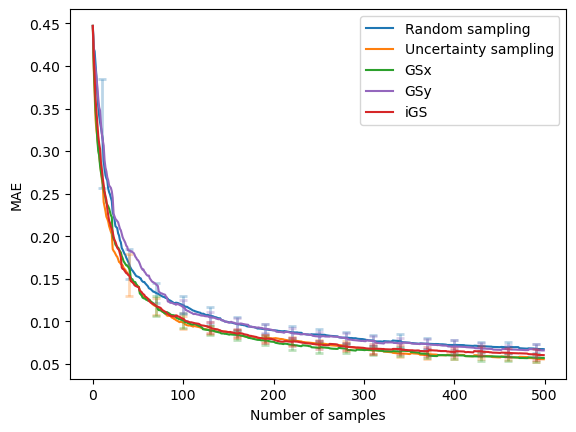

In [51]:
plot_curves(d1, d2, d3, d4, d5, s1, s2, s3, s4, s5, samll=False)

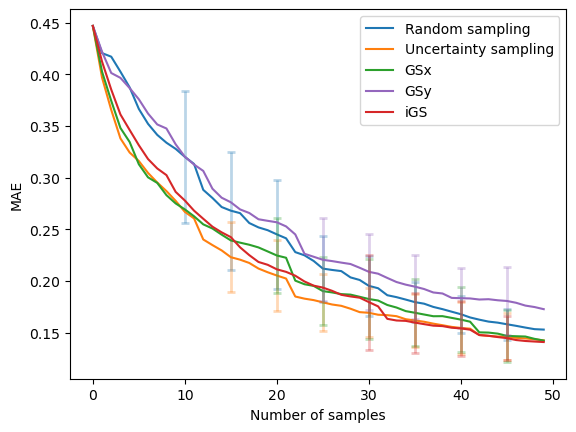

In [50]:
plot_curves(d1, d2, d3, d4, d5, s1, s2, s3, s4, s5, samll=True)

In [152]:
save_path='Results_Plot/'
filename='Results_optimal_fs'

In [158]:
def plot_curves_optimal(d1, d2, d3, d4, d5, s1, s2, s3, s4, s5, opt, opt_error, samll=False):
    fig, ax = plt.subplots()

    if samll==True:
        offset = 10
        error_freq = 5

        num_samples_to_plot = 50  # Number of samples to plot
        # List of your datasets and their corresponding standard deviation arrays
        datasets = [d1[:num_samples_to_plot], d2[:num_samples_to_plot],
                    d3[:num_samples_to_plot], d4[:num_samples_to_plot],
                    d5[:num_samples_to_plot]]
        
        std_devs = [s1[:num_samples_to_plot], s2[:num_samples_to_plot],
                    s3[:num_samples_to_plot], s4[:num_samples_to_plot],
                    s5[:num_samples_to_plot]]

    else:

        # offset = 10
        error_freq = 30
        
        # List of your datasets and their corresponding standard deviation arrays
        datasets = [d1, d2, d3, d4, d5]
        std_devs = [s1, s2, s3, s4, s5]
        
    labels = ['Random sampling', 'Uncertainty sampling', 'GSx', 'GSy', 'iGS']
    # colors = ['blue', 'orange', 'green', 'purple', 'red']
    tableau_colors = plt.get_cmap('tab10').colors[:5]
    # Shift 4th and 5th colors to the first two positions
    shifted_colors = tableau_colors[:3] + tableau_colors[4:5] + tableau_colors[3:4] 
    offsets = [10, 20, 30, 40, 50]
    
    for i, (dataset, std_dev, label, color, offset) in enumerate(zip(datasets, std_devs, labels, shifted_colors, offsets)):
        y = dataset
        e = std_dev
        x = np.arange(len(y))
        p = ax.plot(x, y, label=label, color=color)
    
        xe, ye, ee = x[offset::error_freq], y[offset::error_freq], e[offset::error_freq]
        xe, ye, ee = xe.flatten(), ye.flatten(), ee.flatten()
        ax.errorbar(xe, ye, yerr=ee, alpha=0.3, ls='none', ecolor=p[0].get_color(), elinewidth=2, capsize=3, capthick=2)
        offset += error_freq
    
    # Your other plotting settings...
    # optimal line
    xx = [0, 100, 200, 300, 400, 500]
    yy = [opt] * len(xx)
    ee = [opt_error[0]] * len(xx)
    
    p = ax.plot(xx, yy, 'k--', label='Optimal')
    
    ax.errorbar(xx, yy, yerr=ee, alpha=0.3, ls='none', ecolor=p[-1].get_color(), elinewidth=2, capsize=3, capthick=2)
    
    plt.xlabel('Number of samples')
    plt.ylabel('MAE')
    plt.legend()
    plt.savefig(save_path+filename, dpi=200)
    
    plt.show()

In [47]:
def plot_curves_optimal_update(d1, d2, d3, d4, d5, s1, s2, s3, s4, s5, opt, opt_error, save_path, filename, samll=False):

    plt.style.use('ggplot')
    plt.rcParams['axes.facecolor']='w'
    
    fig, ax = plt.subplots()

    if samll==True:
        offset = 10
        error_freq = 5

        num_samples_to_plot = 50  # Number of samples to plot
        # List of your datasets and their corresponding standard deviation arrays
        
        datasets = [d3[:num_samples_to_plot], d4[:num_samples_to_plot],
                    d5[:num_samples_to_plot], d1[:num_samples_to_plot],
                    d2[:num_samples_to_plot]]
        
        std_devs = [s3[:num_samples_to_plot], s4[:num_samples_to_plot],
                    s5[:num_samples_to_plot], s1[:num_samples_to_plot],
                    s2[:num_samples_to_plot]]

    else:

        offset = 10
        error_freq = 30
        
        # List of your datasets and their corresponding standard deviation arrays
        datasets = [d3, d4, d5, d1, d2]
        std_devs = [s3, s4, s5, s1, s2]
        
    labels = ['GSx', 'GSy', 'iGS', 'Random sampling', 'Uncertainty sampling']
    # # colors = ['blue', 'orange', 'green', 'purple', 'red']
    # tableau_colors = plt.get_cmap('tab10').colors[:5]
    # # Shift 4th and 5th colors to the first two positions
    # shifted_colors = tableau_colors[:3] + tableau_colors[4:5] + tableau_colors[3:4] 
    
    for i, (dataset, std_dev, label) in enumerate(zip(datasets, std_devs, labels)):
        y = dataset
        e = std_dev
        x = np.arange(len(y))
        line_style = line_styles[label]
        p = ax.plot(x, y, label=label, linestyle=line_style)
    
        xe, ye, ee = x[offset::error_freq], y[offset::error_freq], e[offset::error_freq]
        xe, ye, ee = xe.flatten(), ye.flatten(), ee.flatten()
        ax.errorbar(xe, ye, yerr=ee, alpha=0.3, ls='none', ecolor=p[0].get_color(), elinewidth=2, capsize=3, capthick=2)
        offset += error_freq
    
    # Your other plotting settings...
    # optimal line
    xx = [0, 100, 200, 300, 400, 500]
    yy = [opt] * len(xx)
    ee = [opt_error[0]] * len(xx)
    
    p = ax.plot(xx, yy, 'k--', label='Optimal')
    
    ax.errorbar(xx, yy, yerr=ee, alpha=0.3, ls='none', ecolor=p[-1].get_color(), elinewidth=2, capsize=3, capthick=2)

    plt.xlabel('Number of samples')
    plt.ylabel('MAE')
    # plt.title('MAE Smooth with Error Bars')
    plt.legend()
    plt.savefig(save_path+filename, dpi=300)
    plt.show()

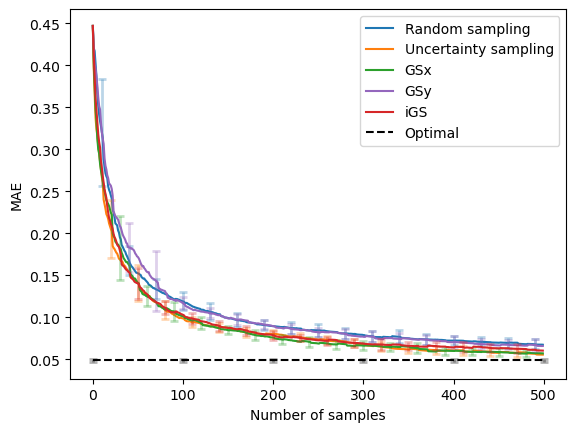

In [155]:
plot_curves(d1, d2, d3, d4, d5, s1, s2, s3, s4, s5, opt, opt_error, samll=False)

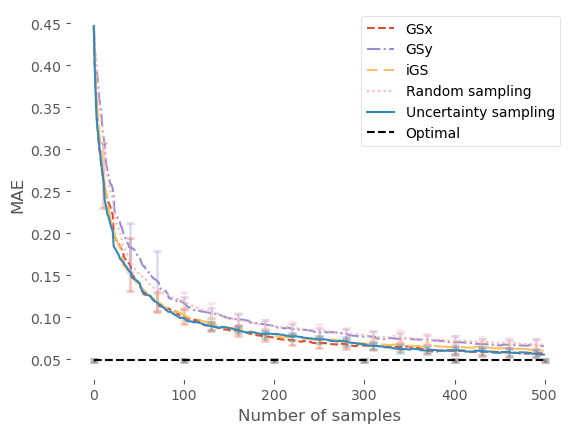

In [48]:
save_path='Results_Plot/'
filename='Results_optimal_fs_update'

plot_curves_optimal_update(d1, d2, d3, d4, d5, s1, s2, s3, s4, s5, opt, opt_error, save_path, filename, samll=False)

In [156]:
threshold

0.12849613355415507

In [49]:
save_path='Results_Plot/'
filename='Results_optimal_fs_short_update'

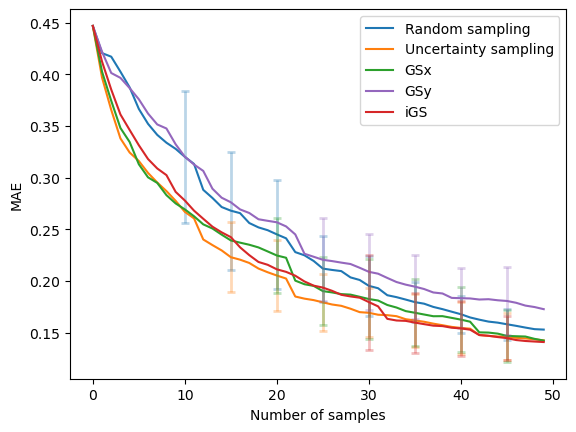

In [168]:
plot_curves(d1, d2, d3, d4, d5, s1, s2, s3, s4, s5, save_path, filename, samll=True)

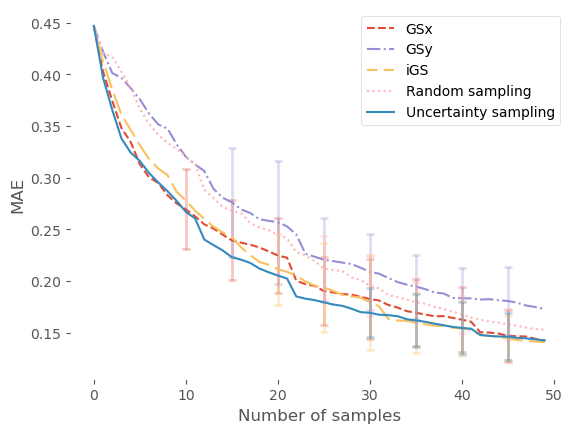

In [52]:
plot_curves_update(d1, d2, d3, d4, d5, s1, s2, s3, s4, s5, save_path, filename, samll=True)

In [1]:
import ot